In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/data.csv')
df.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date,time,weekday,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,04:30:07,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
1,0.53,Lyft,North Station,Haymarket Square,27.5,1.0,Lux Black XL,2018-12-16,04:05:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
2,0.49,Uber,North Station,Haymarket Square,16.0,1.0,Black,2018-12-16,23:15:05,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
3,0.49,Uber,North Station,Haymarket Square,7.0,1.0,UberX,2018-12-16,23:15:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
4,0.49,Uber,North Station,Haymarket Square,8.0,1.0,WAV,2018-12-16,08:40:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333


In [3]:
df.isnull().sum()

distance                0
cab_type                0
destination             0
source                  0
price                   0
surge_multiplier        0
name                    0
date                    0
time                    0
weekday                 0
hour                    0
time_of_day             0
source_temp             0
source_clouds           0
source_pressure         0
source_rain             0
source_humidity         0
source_wind             0
destination_temp        0
destination_clouds      0
destination_pressure    0
destination_rain        0
destination_humidity    0
destination_wind        0
dtype: int64

In [6]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

940
0


In [8]:
df_uber = df[df['cab_type'] == "Uber"]
df_lyft = df[df['cab_type'] == "Lyft"]

# Visualization

### Analyze the relation of Surge_Multiplier and day of week for Lyft¶


In [9]:
surge_df = df_lyft[df_lyft["surge_multiplier"] >1]
high_surge = pd.DataFrame(surge_df.groupby(['weekday', "surge_multiplier"]).size().reset_index())
high_surge.columns = ["Weekday", "Surge", "Count"]

'Weekday Wise Surge Multiplier for Lyft'

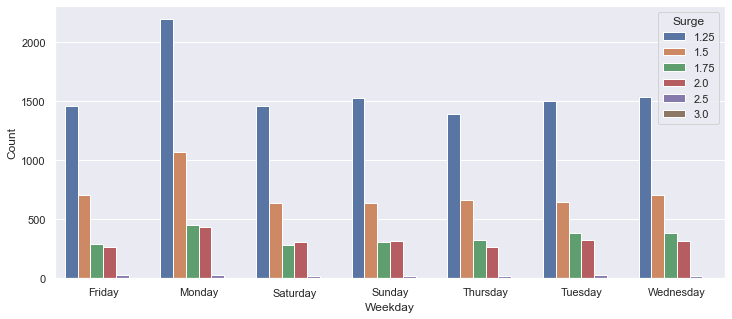

In [10]:
plt.figure(figsize = (12, 5))
sns.barplot(x="Weekday", y = "Count", hue= "Surge", data=high_surge).set_title
("Weekday Wise Surge Multiplier for Lyft")

#### We can conclude that:
1. Surge_multiplier 1.25 happens most frequently.
2. Monday is the day that customer most likely to encounter it.
3. Surge_multiplier 3.0 is very unlikely to happen.